# Importing all the Libraries required for the prediction

In [191]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [192]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)

In [193]:
df = pd.read_csv('SAADAA_assessment_data - Sheet1.csv')

In [194]:
df.head()

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
0,CUST00001,39,Delhi,Returning,ORD000001,08/12/2023,4015.21,Net Banking,9,5,No,Jackets,SKU0001,XXL,In Stock,Word of Mouth,36
1,CUST00002,52,Hyderabad,Returning,ORD000002,06/09/2023,2205.61,Credit Card,3,15,No,T-Shirts,SKU0002,S,Out of Stock,Google Ads,37
2,CUST00003,29,Pune,Returning,ORD000003,01/05/2023,858.84,Net Banking,8,30,No,T-Shirts,SKU0003,L,In Stock,Email Marketing,95
3,CUST00004,15,Jaipur,Returning,ORD000004,02/03/2023,500.00,UPI,1,0,No,T-Shirts,SKU0004,XXL,In Stock,Word of Mouth,10
4,CUST00005,43,Pune,Returning,ORD000005,11/04/2023,1843.50,Wallet,9,40,Yes,Sweatshirts,SKU0005,L,In Stock,Word of Mouth,0


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1000 non-null   object 
 1   customer_tenure    1000 non-null   int64  
 2   customer_location  1000 non-null   object 
 3   customer_type      1000 non-null   object 
 4   order_id           1000 non-null   object 
 5   order_date         1000 non-null   object 
 6   order_value        1000 non-null   float64
 7   payment_method     1000 non-null   object 
 8   order_frequency    1000 non-null   int64  
 9   discount_applied   1000 non-null   int64  
 10  return_status      1000 non-null   object 
 11  product_category   1000 non-null   object 
 12  product_sku        1000 non-null   object 
 13  size               1000 non-null   object 
 14  inventory_status   1000 non-null   object 
 15  source             1000 non-null   object 
 16  engagement_score   1000 n

# Dropping of the columns which are not required for our analysis

In [196]:
df.drop('customer_id',axis=1,inplace=True)

In [197]:
df.drop('customer_location',axis=1,inplace=True)

In [198]:
df.drop('customer_type',axis=1,inplace=True)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_tenure   1000 non-null   int64  
 1   order_id          1000 non-null   object 
 2   order_date        1000 non-null   object 
 3   order_value       1000 non-null   float64
 4   payment_method    1000 non-null   object 
 5   order_frequency   1000 non-null   int64  
 6   discount_applied  1000 non-null   int64  
 7   return_status     1000 non-null   object 
 8   product_category  1000 non-null   object 
 9   product_sku       1000 non-null   object 
 10  size              1000 non-null   object 
 11  inventory_status  1000 non-null   object 
 12  source            1000 non-null   object 
 13  engagement_score  1000 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 109.5+ KB


# Student's T-test to identify relationship between inventory and other columns

In [200]:
from scipy.stats import ttest_ind
in_stock_values = df[df['inventory_status'] == 'In Stock']['order_value']
out_of_stock_values = df[df['inventory_status'] == 'Out of Stock']['order_value']

# Perform t-test
t_stat, p_value = ttest_ind(in_stock_values, out_of_stock_values, equal_var=False)  # Use equal_var=False if variance is different

print("T-Statistic:", t_stat)
print("P-value:", p_value)

T-Statistic: 1.2605302596044783
P-value: 0.2098665554887264


The P-value is yeilding a result which is above 0.05 (in our case 0.209) Hence the column order_value is not impacting the inventory status

In [201]:
from scipy.stats import ttest_ind
in_stock_values1 = df[df['inventory_status'] == 'In Stock']['order_frequency']
out_of_stock_values1 = df[df['inventory_status'] == 'Out of Stock']['order_frequency']

# Perform t-test
t_stat, p_value = ttest_ind(in_stock_values1, out_of_stock_values1, equal_var=False)  

print("T-Statistic:", t_stat)
print("P-value:", p_value)

T-Statistic: -1.3848548467664947
P-value: 0.16863163425670752


The P-value is yeilding a result which is above 0.05 (in our case 0.169) Hence the column order_frequecny is not impacting the inventory status

In [202]:
print(df['inventory_status'].value_counts(normalize=True))

inventory_status
In Stock        0.899
Out of Stock    0.101
Name: proportion, dtype: float64


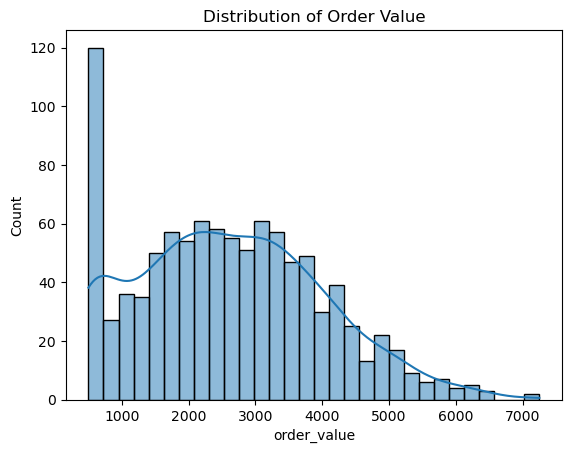

In [203]:
sns.histplot(df['order_value'], bins=30, kde=True)
plt.title("Distribution of Order Value")
plt.show()

In [204]:
print(df['order_value'].dtype)  # Should be float or int
print(df['order_value'].isnull().sum()) 

float64
0


# Since the data distribution for order_value is right skewed we use the Mann Whitney test to identify the correlation

In [205]:
from scipy.stats import mannwhitneyu

yes_values = df[df['inventory_status'] == 'In Stock']['order_value']
no_values = df[df['inventory_status'] == 'Out of Stock']['order_value']

u_stat, p_value = mannwhitneyu(yes_values, no_values, alternative='two-sided')
print("Mann-Whitney U Test P-Value:", p_value)


Mann-Whitney U Test P-Value: 0.22398115417653897


## There are no correlation between the two. 

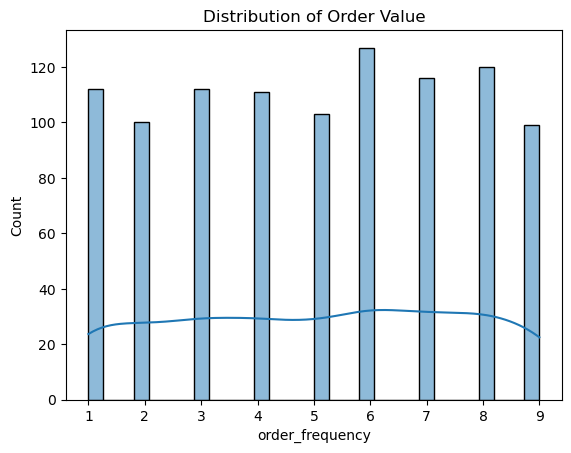

In [206]:
sns.histplot(df['order_frequency'], bins=30, kde=True)
plt.title("Distribution of Order Value")
plt.show()

In [207]:
from scipy.stats import mannwhitneyu

yes_values1 = df[df['inventory_status'] == 'In Stock']['order_frequency']
no_values1 = df[df['inventory_status'] == 'Out of Stock']['order_frequency']

u_stat, p_value = mannwhitneyu(yes_values1, no_values1, alternative='two-sided')
print("Mann-Whitney U Test P-Value:", p_value)

Mann-Whitney U Test P-Value: 0.14853212488134288


In [208]:
df.order_frequency.value_counts()

order_frequency
6    127
8    120
7    116
3    112
1    112
4    111
5    103
2    100
9     99
Name: count, dtype: int64

order_frequncy has no correlationship with inventory status

In [209]:
from scipy.stats import mannwhitneyu

yes_values2 = df[df['inventory_status'] == 'In Stock']['discount_applied']
no_values2 = df[df['inventory_status'] == 'Out of Stock']['discount_applied']

u_stat, p_value = mannwhitneyu(yes_values2, no_values2, alternative='two-sided')
print("Mann-Whitney U Test P-Value:", p_value)


Mann-Whitney U Test P-Value: 0.7380354265026704


No correlation 

In [210]:
df.drop('order_id',axis=1,inplace=True)

In [211]:
df.drop('order_date',axis=1,inplace=True)

In [212]:
colm_to_drop = {'payment_method', 'return_status', 'source'}
df.drop(columns=colm_to_drop,axis=1,inplace=True)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_tenure   1000 non-null   int64  
 1   order_value       1000 non-null   float64
 2   order_frequency   1000 non-null   int64  
 3   discount_applied  1000 non-null   int64  
 4   product_category  1000 non-null   object 
 5   product_sku       1000 non-null   object 
 6   size              1000 non-null   object 
 7   inventory_status  1000 non-null   object 
 8   engagement_score  1000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


# Reordering the columns for our predictive Model 

In [214]:
order = ['customer_tenure', 'order_value', 'order_frequency','discount_applied','product_category', 
         'product_sku', 'size', 'engagement_score', 'inventory_status']
df = df[order]

In [215]:
df.drop('customer_tenure', axis=1, inplace=True)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_value       1000 non-null   float64
 1   order_frequency   1000 non-null   int64  
 2   discount_applied  1000 non-null   int64  
 3   product_category  1000 non-null   object 
 4   product_sku       1000 non-null   object 
 5   size              1000 non-null   object 
 6   engagement_score  1000 non-null   int64  
 7   inventory_status  1000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.6+ KB


<Axes: xlabel='inventory_status'>

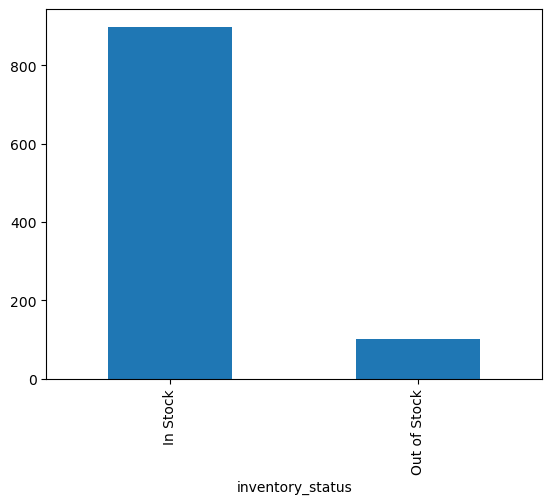

In [217]:
df.inventory_status.value_counts().plot(kind='bar')

<Axes: >

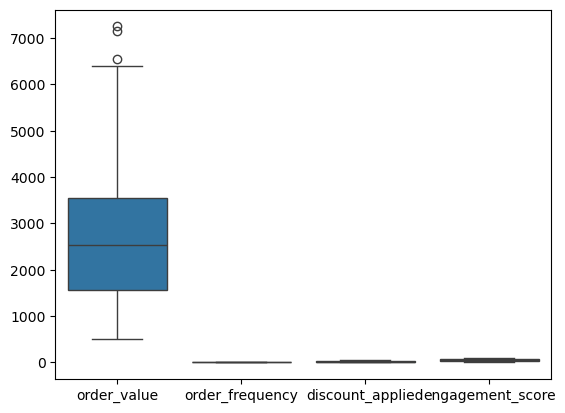

In [218]:
sns.boxplot(df)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_value       1000 non-null   float64
 1   order_frequency   1000 non-null   int64  
 2   discount_applied  1000 non-null   int64  
 3   product_category  1000 non-null   object 
 4   product_sku       1000 non-null   object 
 5   size              1000 non-null   object 
 6   engagement_score  1000 non-null   int64  
 7   inventory_status  1000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.6+ KB


In [220]:
df['discount_applied'].value_counts()

discount_applied
0     299
15    114
5     111
20    103
30    100
25     91
10     88
50     48
40     46
Name: count, dtype: int64

In [221]:
df.product_category.value_counts()

product_category
Jackets        175
Jeans          173
T-Shirts       169
Shirts         169
Dresses        166
Sweatshirts    148
Name: count, dtype: int64

In [222]:
df = df.copy()
df['Jackets'] = df['product_category'].apply(lambda x: 1 if 'Jacket' in x else 0)
df['Jeans'] = df['product_category'].apply(lambda x: 1 if 'Jeans' in x else 0)
df['T-Shirts'] = df['product_category'].apply(lambda x:1 if 'T-Shirts' in x else 0)
df['Shirts'] = df['product_category'].apply(lambda x:1 if 'Shirts' in x else 0)
df['Dresses'] = df['product_category'].apply(lambda x:1 if 'Dresses' in x else 0)
df['Sweatshirts'] = df['product_category'].apply(lambda x:1 if 'Sweatshirts' in x else 0)

In [223]:
df.head()

,order_value,order_frequency,discount_applied,product_category,product_sku,size,engagement_score,inventory_status,Jackets,Jeans,T-Shirts,Shirts,Dresses,Sweatshirts
0,4015.21,9,5,Jackets,SKU0001,XXL,36,In Stock,1,0,0,0,0,0
1,2205.61,3,15,T-Shirts,SKU0002,S,37,Out of Stock,0,0,1,1,0,0
2,858.84,8,30,T-Shirts,SKU0003,L,95,In Stock,0,0,1,1,0,0
3,500.00,1,0,T-Shirts,SKU0004,XXL,10,In Stock,0,0,1,1,0,0
4,1843.50,9,40,Sweatshirts,SKU0005,L,0,In Stock,0,0,0,0,0,1


In [224]:
reorder = [ 'order_value', 'order_frequency','discount_applied','product_category', 
         'product_sku', 'size', 'engagement_score', 'Jackets', 'Jeans', 'T-Shirts', 'Shirts', 'Dresses', 'Sweatshirts','inventory_status']
df = df[reorder]

In [225]:
df.head()

,order_value,order_frequency,discount_applied,product_category,product_sku,size,engagement_score,Jackets,Jeans,T-Shirts,Shirts,Dresses,Sweatshirts,inventory_status
0,4015.21,9,5,Jackets,SKU0001,XXL,36,1,0,0,0,0,0,In Stock
1,2205.61,3,15,T-Shirts,SKU0002,S,37,0,0,1,1,0,0,Out of Stock
2,858.84,8,30,T-Shirts,SKU0003,L,95,0,0,1,1,0,0,In Stock
3,500.00,1,0,T-Shirts,SKU0004,XXL,10,0,0,1,1,0,0,In Stock
4,1843.50,9,40,Sweatshirts,SKU0005,L,0,0,0,0,0,0,1,In Stock


In [226]:
# Dropping of the product_category
df.drop('product_category',axis=1, inplace=True)

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_value       1000 non-null   float64
 1   order_frequency   1000 non-null   int64  
 2   discount_applied  1000 non-null   int64  
 3   product_sku       1000 non-null   object 
 4   size              1000 non-null   object 
 5   engagement_score  1000 non-null   int64  
 6   Jackets           1000 non-null   int64  
 7   Jeans             1000 non-null   int64  
 8   T-Shirts          1000 non-null   int64  
 9   Shirts            1000 non-null   int64  
 10  Dresses           1000 non-null   int64  
 11  Sweatshirts       1000 non-null   int64  
 12  inventory_status  1000 non-null   object 
dtypes: float64(1), int64(9), object(3)
memory usage: 101.7+ KB


# Splitting the column into X and y subsets

In [228]:
X =df.drop(columns=['inventory_status'])
y = df.inventory_status

In [229]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_value       1000 non-null   float64
 1   order_frequency   1000 non-null   int64  
 2   discount_applied  1000 non-null   int64  
 3   product_sku       1000 non-null   object 
 4   size              1000 non-null   object 
 5   engagement_score  1000 non-null   int64  
 6   Jackets           1000 non-null   int64  
 7   Jeans             1000 non-null   int64  
 8   T-Shirts          1000 non-null   int64  
 9   Shirts            1000 non-null   int64  
 10  Dresses           1000 non-null   int64  
 11  Sweatshirts       1000 non-null   int64  
dtypes: float64(1), int64(9), object(2)
memory usage: 93.9+ KB


In [230]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: inventory_status
Non-Null Count  Dtype 
--------------  ----- 
1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [231]:
y

0          In Stock
1      Out of Stock
2          In Stock
3          In Stock
4          In Stock
           ...     
995        In Stock
996        In Stock
997        In Stock
998        In Stock
999        In Stock
Name: inventory_status, Length: 1000, dtype: object

# Label Encoding the y dataset 

In [232]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoder = le.fit_transform(y)

# Spilitting the sets into test train set

In [233]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_encoder,test_size=0.25, random_state=42)

# Creating ML pipelines for Model training

## Logistic Regression 

In [234]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix

# Identify categorical and numerical column indices
categorical_cols = [3, 4]  
numerical_cols = [0, 1, 2, 5, 6, 7, 8, 9, 10, 11] 

# Step 1: Column Transformer with OneHotEncoder for categorical & StandardScaler for numerical
step1 = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), categorical_cols),
    ('scaler', StandardScaler(), numerical_cols)
], remainder='passthrough')

# Step 2: Logistic Regression with increased max_iter
step2 = LogisticRegression(solver='saga', max_iter=2000, random_state=0)

# Create Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Evaluation
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
logi_score = accuracy_score(y_test, y_pred)
print('Accuracy Score:',logi_score)

Confusion Matrix:
 [[230   0]
 [ 20   0]]
Accuracy Score: 0.92


# Classification Report Of Logistic Regression

In [235]:
from sklearn.metrics import classification_report
logi_CR = classification_report(y_test,y_pred)
print(logi_CR)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       230
           1       0.00      0.00      0.00        20

    accuracy                           0.92       250
   macro avg       0.46      0.50      0.48       250
weighted avg       0.85      0.92      0.88       250



# Decision Tree Classification

In [236]:
from sklearn.tree import DecisionTreeClassifier
step3 = DecisionTreeClassifier(random_state=0)

pipe = Pipeline([ ('step1', step1),
                ('step3',step3)
                ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('Confusion Matrix:' , confusion_matrix(y_test, y_pred))
DT_score = accuracy_score(y_test, y_pred) 
print('accuracy_score:',DT_score)

Confusion Matrix: [[229   1]
 [ 20   0]]
accuracy_score: 0.916


## Decision TreeClassification Report

In [237]:
from sklearn.metrics import classification_report
DT_CR = classification_report(y_test,y_pred)
print(DT_CR)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       230
           1       0.00      0.00      0.00        20

    accuracy                           0.92       250
   macro avg       0.46      0.50      0.48       250
weighted avg       0.85      0.92      0.88       250



## Random Forest Classification

In [238]:
from sklearn.ensemble import RandomForestClassifier

step4 = RandomForestClassifier(random_state=0)

pipe = Pipeline([ ('step1', step1),
                ('step4',step4)
                ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('Confusion Matrix:' , confusion_matrix(y_test, y_pred))
RF_score = accuracy_score(y_test, y_pred)
print('accuracy_score:', RF_score)

Confusion Matrix: [[230   0]
 [ 20   0]]
accuracy_score: 0.92


# Classification Report Of Random Forest

In [239]:
from sklearn.metrics import classification_report
RF_CR = classification_report(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       230
           1       0.00      0.00      0.00        20

    accuracy                           0.92       250
   macro avg       0.46      0.50      0.48       250
weighted avg       0.85      0.92      0.88       250



# SVM

In [240]:
from sklearn.svm import SVC
step5 = SVC(random_state=0)

pipe = Pipeline([ ('step1', step1),
                ('step5',step5)
                ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# print('Confusion Matrix:' , confusion_matrix(y_test, y_pred))
SVM_score = accuracy_score(y_test, y_pred)
print('accuracy_score:', SVM_score)

accuracy_score: 0.92


# Classification Report Of SVM

In [241]:
from sklearn.metrics import classification_report
svm_CR =classification_report(y_test,y_pred) 
print(svm_CR)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       230
           1       0.00      0.00      0.00        20

    accuracy                           0.92       250
   macro avg       0.46      0.50      0.48       250
weighted avg       0.85      0.92      0.88       250



# KNN

In [242]:
from sklearn.neighbors import KNeighborsClassifier
step6 = KNeighborsClassifier(n_neighbors=5)

pipe = Pipeline([ ('step1', step1),
                ('step6',step6)
                ])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
print('accuracy_score:', accuracy_score(y_test, y_pred))  # Checking the accuracy Score

accuracy_score: 0.916


# Classification Report KNN

In [243]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       230
           1       0.00      0.00      0.00        20

    accuracy                           0.92       250
   macro avg       0.46      0.50      0.48       250
weighted avg       0.85      0.92      0.88       250



# Analysing The Classification Reports and Accuracy Score
All the models (KNN, SVM, Random Forest, Decision Tree, and Logistic Regression) are showing the same classification report, which indicates a major issue with class imbalance. Here’s what’s happening:
1. High Accuracy but Poor Performance on Minority Class:
Accuracy is 92% because class "0" (majority class) is predicted correctly.
Precision, Recall, and F1-score for class "1" are all 0.00, meaning the models are completely failing to detect this class.
2. Weighted Avg vs. Macro Avg:
    * Weighted Avg (~0.85-0.88 F1-score) is misleading because it considers class imbalance.
    * Macro Avg (~0.46-0.50 F1-score) correctly reflects poor performance due to class "1" being ignored.
3. Which Model is Best?
Since all models give the same results, none of them can be considered "best." The real issue is that they are biased towards the majority class (class "0") and completely failing to classify class "1."

In [244]:
X_test['product_sku'] = X_test['product_sku'].str.replace('SKU', '', regex=True).astype(int)

# Display the updated DataFrame
print(X_test.head())

     order_value  order_frequency  discount_applied  product_sku size  \
521      1659.32                8                 0          522    M   
737      3719.44                6                 0          738   XL   
740       896.12                2                30          741    S   
660      4816.79                8                25          661    M   
411      5344.74                7                 0          412   XL   

     engagement_score  Jackets  Jeans  T-Shirts  Shirts  Dresses  Sweatshirts  
521                73        1      0         0       0        0            0  
737                19        0      0         0       0        1            0  
740                71        0      0         1       1        0            0  
660                43        0      0         1       1        0            0  
411                89        0      0         0       0        1            0  


In [245]:
le = LabelEncoder()
X_test['size'] = le.fit_transform(X_test['size'])

## Using SMOTE for OverSampling 

In [246]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Identify categorical columns that need encoding
categorical_cols = ['product_sku', 'size']  # Only these need encoding

# Initialize label encoders
label_encoders = {}

for col in categorical_cols:
    if col in X_train.columns:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        label_encoders[col] = le  # Store encoders for later use
    else:
        print(f"Warning: Column '{col}' not found in X_train")

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print class distribution before and after SMOTE
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({0: 669, 1: 81})
After SMOTE: Counter({0: 669, 1: 669})


## Logistic Regression on resampled data

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_log = log_model.predict(X_test)
y_pred_proba_log = log_model.predict_proba(X_test)[:, 1]

# Evaluate
log_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_log),
    "Precision": precision_score(y_test, y_pred_log),
    "Recall": recall_score(y_test, y_pred_log),
    "F1-score": f1_score(y_test, y_pred_log),
    "AUC-ROC": roc_auc_score(y_test, y_pred_proba_log)
}

print("Logistic Regression Performance:")
print(log_metrics)



Logistic Regression Performance:
{'Accuracy': 0.92, 'Precision': 0.0, 'Recall': 0.0, 'F1-score': 0.0, 'AUC-ROC': 0.4960869565217392}


## Random Forest on resampled data

In [185]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-score": f1_score(y_test, y_pred_rf),
    "AUC-ROC": roc_auc_score(y_test, y_pred_proba_rf)
}

print("Random Forest Performance:")
print(rf_metrics)


Random Forest Performance:
{'Accuracy': 0.92, 'Precision': 0.0, 'Recall': 0.0, 'F1-score': 0.0, 'AUC-ROC': 0.5478260869565217}


## XGBOOST

In [186]:
import xgboost as xgb

# Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
xgb_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1-score": f1_score(y_test, y_pred_xgb),
    "AUC-ROC": roc_auc_score(y_test, y_pred_proba_xgb)
}

print("XGBoost Performance:")
print(xgb_metrics)


XGBoost Performance:
{'Accuracy': 0.912, 'Precision': 0.0, 'Recall': 0.0, 'F1-score': 0.0, 'AUC-ROC': 0.47771739130434787}


In [189]:
import pandas as pd

performance_df = pd.DataFrame({
    "Logistic Regression": log_metrics,
    "Random Forest": rf_metrics,
    "XGBoost": xgb_metrics
}).T

print(performance_df)


                     Accuracy  Precision  Recall  F1-score   AUC-ROC
Logistic Regression     0.920        0.0     0.0       0.0  0.496087
Random Forest           0.920        0.0     0.0       0.0  0.547826
XGBoost                 0.912        0.0     0.0       0.0  0.477717


## Conclusion 
- Based on the evaluation metrics, none of the models—Logistic Regression, Random Forest, or XGBoost—can be considered effective for this classification problem. While accuracy is relatively high (~91-92%), the Precision, Recall, and F1-score are all 0.0, indicating that the models fail to correctly classify the positive class. Additionally, the AUC-ROC values hover around 0.5, suggesting that the models are no better than random guessing.

- This poor performance is likely due to imbalanced data, where one class significantly outweighs the other, leading the models to predict only the majority class. As a result, none of the models can be chosen for reliable classification.
 - Below is the class differences of the dataset

In [190]:
from collections import Counter
print(Counter(y_test))

Counter({0: 230, 1: 20})
